# TP 10 : Les réseaux de neurones


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import colors
%matplotlib inline


## II- Amélioration d'un modèle

On va utiliser le dataset MNIST. 
Ici, on a utiliser seulement 100 échantillons pour l'entraînement (10 pour chaque chiffre) et 30 pour la validation (3 pour chaque chiffre). 
Donc, le modèle ne sera pas puissant ; c'est juste pour monter quelques applications dans le traitement d'images.

Le dataset contient des images de 28*28 pixels représentant des chiffres écrits manuellement. chaque pixel est un nombre entre 0 et 255.

2022-05-25 19:34:34.388144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 19:34:34.388182: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Forme du dataset d'entrainement (M, W, H, C) =  (100, 28, 28, 1)
Forme du dataset de test (M, W, H, C) =  (30, 28, 28, 1)


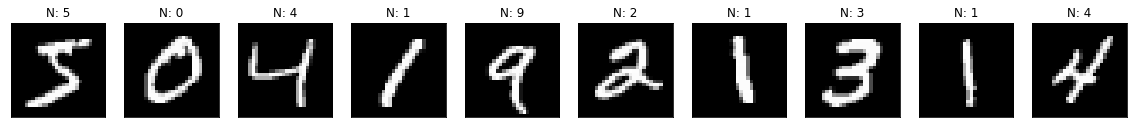

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, UpSampling2D
from tensorflow.keras.models import Sequential, Model

# cette instruction va télécharger la totalité du dataset
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

train = pd.read_csv("data/mnist_train.csv")
test = pd.read_csv("data/mnist_test.csv")

x_train = train.iloc[:, :-1].values # Premières colonnes 
y_train = train.iloc[:,-1].values # Dernière colonne 
x_test = test.iloc[:, :-1].values # Premières colonnes 
y_test = test.iloc[:,-1].values # Dernière colonne 

x_train = np.reshape(x_train, [-1, 28, 28, 1])
x_test = np.reshape(x_test, [-1, 28, 28, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

print('Forme du dataset d\'entrainement (M, W, H, C) = ' , x_train.shape)
print('Forme du dataset de test (M, W, H, C) = ' ,x_test.shape)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    plt.title("N: " + str(y_train[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### II-1- Classement des chiffres

Ici, on essaye d'entrainer un modèle qui reconnait les chiffres de 0 à 9. 
Il y a deux modèles : 
- Dans le première cellule, c'est une modèle basique (
- Dans la deuxième cellule, c'est un modèle identique au premier. Sauf, vous devez le changer en ajoutant des couches : Dropout, MaxPooling2D, etc. Le deuxième modèle doit être une amélioration. Vous devez discuter comment vous l'avez améliorer, c-à-d, si vous avez ajouter une autre couche, pourquoi ?

2022-05-25 19:34:36.570838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 19:34:36.570904: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 19:34:36.570931: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kariminf-pc): /proc/driver/nvidia/version does not exist
2022-05-25 19:34:36.571217: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


entrainement ...


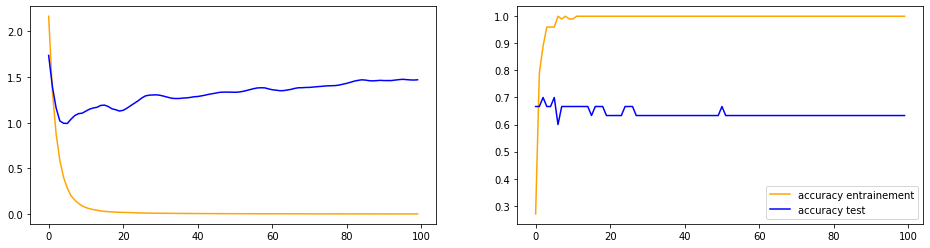

In [3]:


NBR_IT = 100
epochs = range(NBR_IT)

input_shape = (28, 28, 1)

detect_basic = Sequential()
detect_basic.add(Dense(128, activation="relu", input_shape=input_shape))
detect_basic.add(Flatten())
detect_basic.add(Dense(10, activation="softmax"))

detect_basic.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

print("entrainement ...")
results = detect_basic.fit(x_train, y_train_onehot, epochs=NBR_IT, validation_data=(x_test, y_test_onehot), verbose=0)
# print("evaluation ...")
# score = detect_basic.evaluate(x_test, y_test_onehot, verbose=0)

history = results.history
couts_train = history["loss"]
couts_test = history["val_loss"]
accuracy_train = history["accuracy"]
accuracy_test = history["val_accuracy"]
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax[0].plot(epochs, couts_train, color="orange", label="cout entrainement")
ax[0].plot(epochs, couts_test, color="blue", label="cout test")
ax[1].plot(epochs, accuracy_train, color="orange", label="accuracy entrainement")
ax[1].plot(epochs, accuracy_test, color="blue", label="accuracy test")
plt.legend()
plt.show()

entrainement ...


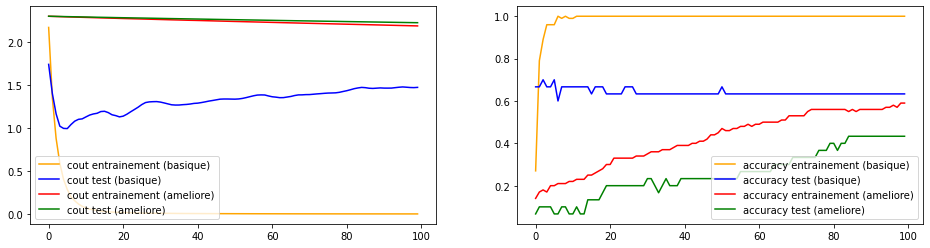

In [4]:
# TODO amélioer le modèle du classement de chiffres
# =============== Modifier ici ===================
detect_good = Sequential()
detect_good.add(Dense(128, activation="relu", input_shape=input_shape))
detect_good.add(Flatten())
detect_good.add(Dense(10, activation="softmax"))

detect_good.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adadelta(),
    metrics=["accuracy"])
# =============== Fin modification ================


print("entrainement ...")
results = detect_good.fit(x_train, y_train_onehot, epochs=NBR_IT, validation_data=(x_test, y_test_onehot), verbose=0)
# print("evaluation ...")
# score = detect_basic.evaluate(x_test, y_test_onehot, verbose=0)

history = results.history

couts_train2 = history["loss"]
couts_test2 = history["val_loss"]
accuracy_train2 = history["accuracy"]
accuracy_test2 = history["val_accuracy"]
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax[0].plot(epochs, couts_train, color="orange", label="cout entrainement (basique)")
ax[0].plot(epochs, couts_test, color="blue", label="cout test (basique)")
ax[0].plot(epochs, couts_train2, color="red", label="cout entrainement (ameliore)")
ax[0].plot(epochs, couts_test2, color="green", label="cout test (ameliore)")
ax[0].legend()
ax[1].plot(epochs, accuracy_train, color="orange", label="accuracy entrainement (basique)")
ax[1].plot(epochs, accuracy_test, color="blue", label="accuracy test (basique)")
ax[1].plot(epochs, accuracy_train2, color="red", label="accuracy entrainement (ameliore)")
ax[1].plot(epochs, accuracy_test2, color="green", label="accuracy test (ameliore)")
ax[1].legend()
plt.show()

### II-2- Débruitage des images

Ici, on va implémenter un autoencodeur qui a comme but de débruiter les images. 
Tout d'abord, on ajoute du bruit aux images. Ensuite, l'autoencodeur est entraîné sur les images bruitées en entrée et leurs équivalentes non bruitées en sortie. 

Un modèle de base est fourni. Vous devez modifier ce modèle pour avoir un autre meilleur. Ceci en ajoutant des couches, en supprimant des couches et en modifiant les paramètres comme le nombre des neurones, etc.

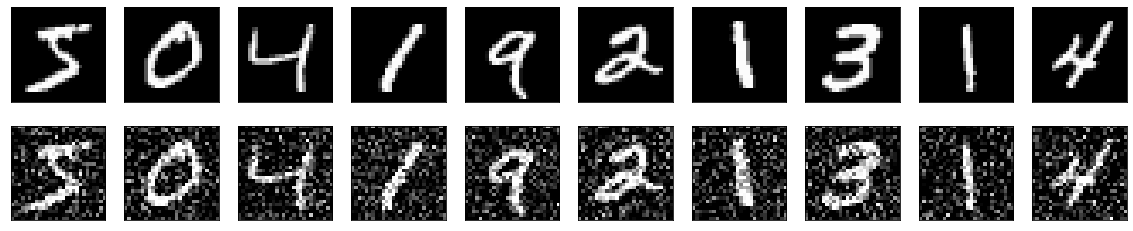

In [5]:
# Créer les images bruitées
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### II-2-1- Modèle de base 

**Ne modifier pas ça**

entrainement (basic) ...


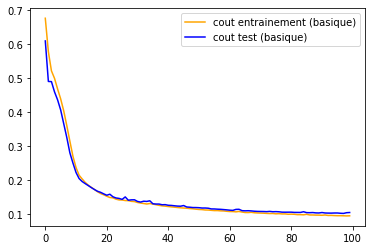

In [6]:

NBR_IT_ae = 100
epochs_ae = range(NBR_IT_ae)

input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

bruit_basic = Model(input_img, decoded)
bruit_basic.compile(optimizer='adam', loss='binary_crossentropy')



print("entrainement (basic) ...")
results = bruit_basic.fit(x_train_noisy, x_train,
                epochs=NBR_IT_ae,
                validation_data=(x_test_noisy, x_test),
                verbose=0
                )
x_decoded = bruit_basic.predict(x_test_noisy)
history = results.history
couts_train = history["loss"]
couts_test = history["val_loss"]


plt.plot(epochs, couts_train, color="orange", label="cout entrainement (basique)")
plt.plot(epochs, couts_test, color="blue", label="cout test (basique)")
plt.legend()
plt.show()

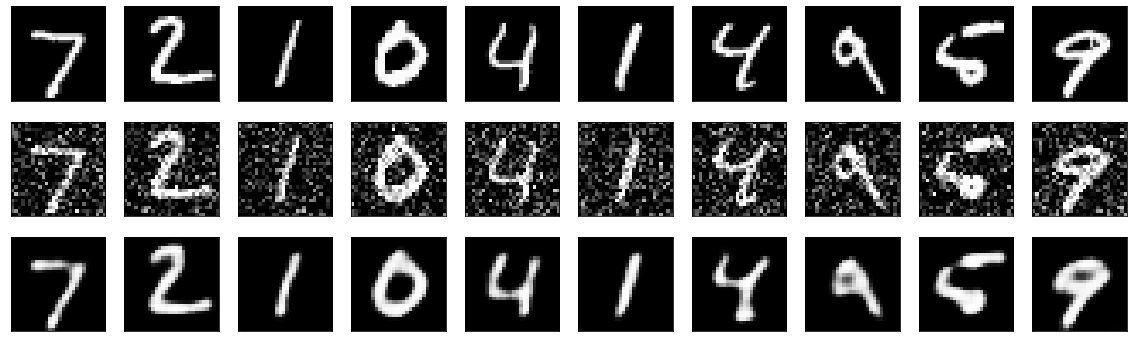

In [7]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # image original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # image bruitée
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # image débruitée
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### II-2-2- Modèle amélioré 

**Modifier ici**

entrainement (ameliore) ...


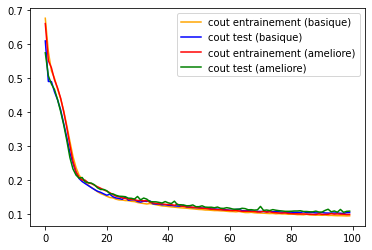

In [8]:
# TODO améliorer le modèle du débruitage des images
# =============== Modifier ici ===================

input_img2 = Input(shape=(28, 28, 1))

x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img2)
x2 = MaxPooling2D((2, 2), padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)

encoded2 = MaxPooling2D((2, 2), padding='same')(x2)

# at this point the representation is (7, 7, 32)

x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded2)
x2 = UpSampling2D((2, 2))(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = UpSampling2D((2, 2))(x2)
decoded2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x2)


bruit_good = Model(input_img2, decoded2)
bruit_good.compile(optimizer='adam', loss='binary_crossentropy')
# =============== Fin modification ================

print("entrainement (ameliore) ...")
results = bruit_good.fit(x_train_noisy, x_train,
                epochs=NBR_IT_ae,
                validation_data=(x_test_noisy, x_test),
                verbose=0
                )
x_decoded2 = bruit_good.predict(x_test_noisy)
history = results.history
couts_train2 = history["loss"]
couts_test2 = history["val_loss"]

plt.plot(epochs, couts_train, color="orange", label="cout entrainement (basique)")
plt.plot(epochs, couts_test, color="blue", label="cout test (basique)")
plt.plot(epochs, couts_train2, color="red", label="cout entrainement (ameliore)")
plt.plot(epochs, couts_test2, color="green", label="cout test (ameliore)")
plt.legend()
plt.show()

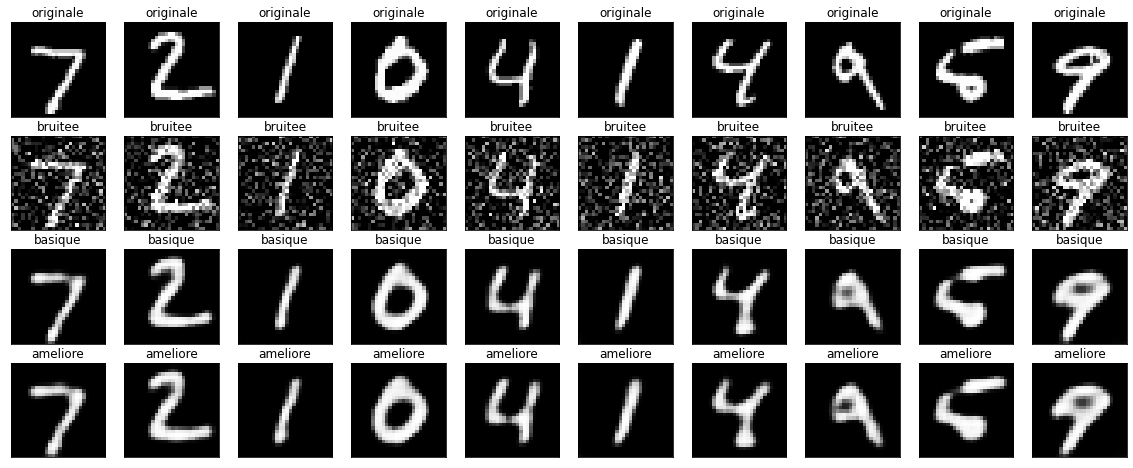

In [9]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    # image original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("originale")
    
    # image bruitée
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("bruitee")

    # image débruitée (basique)
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(x_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("basique")
    
    # image débruitée (amélioré)
    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(x_decoded2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("ameliore")
    
plt.show()